-- 
#50% 이하로 떨어질때까지 투입하는 약의 그램수 IC 50

----
### 
Date : 2024.8.16  
Authour : Forrest D Park        
Warning: 박동근 이외에는 이 파일을 건드리지 말것!!

## File Fetch

😼Chemical Data Analysis Start
___ 🟡 PLOTSETTING. 
______ 📌 matplotlib plot 한글화 Setting
___## OS platform 한글 세팅완료 ## ___
- column 수 : 15
Index(['Molecule ChEMBL ID', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'pChEMBL Value', 'Assay ChEMBL ID',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'IC50_nM', 'pIC50', 'Smiles'],
      dtype='object')
- row 수    : 1952
- null 수   : 0
- 칼럼별 데이터 중복체크
idx.columName |				 |Colum Info(dtype)|** 
 ----------------------------------------------------------------
1.[Standard Type(object)]:		 1 	/1952 	[uniq/raw] ---📌값의 종류가 10개 미만 입니다. 
		 ----------------------------------------
		 |-[0] IC50 : 	1952
		 ----------------------------------------
숫자형데이터가 아닙니다
2.[Standard Relation(object)]:		 1 	/1952 	[uniq/raw] ---📌값의 종류가 10개 미만 입니다. 
		 ----------------------------------------
		 |-[0] '=' : 	1952
		 ----------------------------------------
숫자형데이터가 아닙니다
4.[Sta

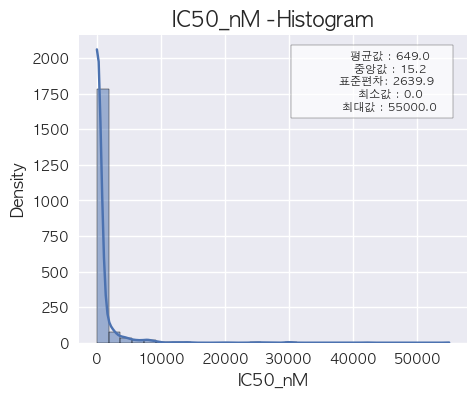

13.[pIC50(float64)]:		 377 	/1952 	[uniq/raw]


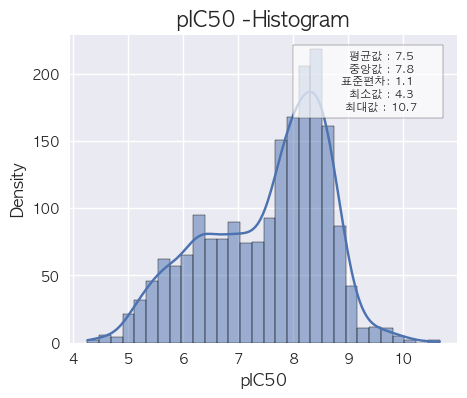

14.[Smiles(object)]:		 1952 	/1952 	[uniq/raw]
숫자형데이터가 아닙니다
	 ...etc (추가로 0개의 칼럼이 있습니다 )
	[RESULT] 🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀
	🟦10개이하의 값 종류를 가지는 칼럼 
		- Standard Type:1: ['IC50']
		- Standard Relation:1: ["'='"]
		- Standard Units:1: ['nM']
		- Target ChEMBL ID:1: ['CHEMBL3778']
		- Target Name:1: ['Interleukin-1 receptor-associated kinase 4']
		- Target Organism:1: ['Homo sapiens']
		- Target Type:1: ['SINGLE PROTEIN']
	 총 7개


['Standard Type',
 'Standard Relation',
 'Standard Units',
 'Target ChEMBL ID',
 'Target Name',
 'Target Organism',
 'Target Type']

In [1]:
from Functions.FunctionML import *
import warnings ;warnings.filterwarnings('ignore')
LibraryInstall.install()
import pandas as pd
test = pd.read_csv("../open/test.csv")
train = pd.read_csv("../open/train.csv")
sample_submission = pd.read_csv("../open/sample_submission.csv")
print(yellow("😼Chemical Data Analysis Start",True))
DataPreprocessing.plotSetting()
DataPreprocessing.dataInfo(train)

---
### 칼럼의 의미
Target Organism: 호모사피엔스 단일      
Target Type: SINGLE PROTEIN 단일
Molecule ChEMBL ID: ChEMBL 데이터베이스에서 분자의 고유 식별자     
Standard Type: 측정된 활성의 유형 (여기서는 IC50)        
Standard Relation: 활성 값의 관계 (여기서는 '=', 정확한 값을 의미)       
Standard Value: 표준화된 활성 값         
Standard Units: 활성 값의 단위 (여기서는 nM, 나노몰)       
pChEMBL Value: -log10(몰 단위의 활성 값). 활성의 크기를 나타내는 표준화된 값           
Assay ChEMBL ID: 활성을 측정한 실험의 고유 식별자         
Target ChEMBL ID: 목표 단백질의 고유 식별자        
Target Name: 목표 단백질의 이름           
Target Organism: 목표 단백질이 속한 생물종            
Target Type: 목표의 유형 (여기서는 단일 단백질)          
Document ChEMBL ID: 이 데이터의 출처 문서의 고유 식별자        
IC50_nM: IC50 값 (나노몰 단위)       
pIC50: -log10(IC50). IC50의 음의 로그 값으로, 활성의 크기를 나타냄          
Smiles: 화합물의 구조를 나타내는 SMILES 문자열          


---
### Data 중에서 단하나의 값으로 모든 데이터 중복하는 칼럼 
 Standard Type:1: ['IC50']
- Standard Relation:1: ["'='"]
- Standard Units:1: ['nM']
- Target ChEMBL ID:1: ['CHEMBL3778']
- Target Name:1: ['Interleukin-1 receptor-associated kinase 4']
- Target Organism:1: ['Homo sapiens']
- Target Type:1: ['SINGLE PROTEIN']

---
####  수치형인 칼럼 : 
IC50_nM: IC50 값 (나노몰 단위)       
pIC50: -log10(IC50). IC50의 음의 로그 값으로, 활성의 크기를 나타냄    

#### 문자형 칼럼 


---
### 문자형 칼럼을 분석하기 위한 함수를 만들어 두자. 
- 문자형 칼럼에서는 무엇이 중요한가? 



In [3]:
to_drop_cols = [
    'Standard Type',
    'Standard Relation',
    'Standard Units',
    'Target ChEMBL ID',
    'Target Name',
    'Target Organism',
    'Target Type',
    ]

numeric_cols= ['IC50_nM','pIC50']
df_strType = train.drop(columns = to_drop_cols).drop(columns=numeric_cols)




In [13]:
### 문자형 데이터  분석
print(yellow(df_strType.columns[0]))
df_strType[df_strType.columns[0]]

Molecule ChEMBL ID


0       CHEMBL4443947
1       CHEMBL4556091
2       CHEMBL4566431
3       CHEMBL4545898
4       CHEMBL4448950
            ...      
1947     CHEMBL380009
1948     CHEMBL377654
1949     CHEMBL208667
1950    CHEMBL3403453
1951    CHEMBL4093989
Name: Molecule ChEMBL ID, Length: 1952, dtype: object